In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import anndata as ad
import os

# Load 5k_oct

In [3]:
"""
Put path to the directory with your files here
"""
base_dir='/nfs/team298/beacon_ls34/'
[x for x in os.listdir(base_dir)] 

['20240409_run1_skin_nosegmentation',
 '20240711__110557__SGP174_SKI_run1_skin segmented',
 '20250710_SGP263_5K_3Dniche',
 'adata_xeniumimmunooncology_processed.h5ad',
 '20240815__115640__SGP177_SKI_run1',
 'paths_all2.csv',
 '20250326_SGP237_5K_BSTOP Pso FF',
 'loaded_adatas',
 '20241107__113135__SGP205_SKI_run1',
 '20240624__145030_immunoncologypanel_segmented',
 'H&Es 07112024',
 '20240628__123954__AF_ECZ5K_human_skin_BEACON_1',
 '20241010__132615__SGP194_SKI_RUN1',
 'visium_pilot',
 'paths_all.csv',
 '20250227_SGP218_5K_BEACONomics_FFPE',
 'downloadfiles.sh',
 '20250210__162905__SGP217_LP1',
 'adata_xeniumimmunooncology_processed.h5ad.newnotebooks']

In [6]:
"""
test that a file seems corrects
the list above should just be paths to xenium data - no other files
"""
RUN_ID = '20240409_run1_skin_nosegmentation/'
print(base_dir+RUN_ID)
os.listdir(base_dir+RUN_ID)

/nfs/team298/beacon_ls34/20240409_run1_skin_nosegmentation/


['output-XETG00055__0010679__Jun23-SKO-D144_P4D1-s28__20240409__141709',
 'output-XETG00055__0010670__BK18-SKI-27-FO-2-S2__20240409__141709',
 'output-XETG00055__0010679__F115-SKI-27-FO-1-S13__20240409__141709',
 'output-XETG00055__0010670__BK18-SKI-27-FO-1-S2__20240409__141709',
 'output-XETG00055__0010679__Jun23_SKO_D137_P11B1-s23__20240409__141709',
 'output-XETG00055__0010670__BK18-SKI-27-FO-2-S3__20240409__141709',
 'output-XETG00055__0010670__BK18-SKI-27-FO-1-S3__20240409__141709',
 'output-XETG00055__0010679__F122-SKI-27-FO-1-S13__20240409__141709']

In [7]:
"""
load adatas
"""

adatas_dict = {}
for sample_id in os.listdir(base_dir + RUN_ID):
    print(sample_id)
    if not sample_id.startswith("adata"):
        new_path = base_dir + RUN_ID + sample_id
        print(f"New path: {new_path}")
        
        print(os.listdir(new_path))
        print(" ")
        adata = sc.read_10x_h5(filename=new_path+"/cell_feature_matrix.h5")
        df = pd.read_csv(new_path+"/cells.csv.gz")
        df.set_index(adata.obs_names, inplace=True)
        adata.obs = df.copy()
        adata.obsm["spatial"] = adata.obs[["x_centroid", "y_centroid"]].copy().to_numpy()

        adatas_dict[sample_id] = adata
        print(adata)
        print()

adata = ad.concat(adatas_dict.values(), join='outer', label='sample_id', keys=list(adatas_dict.keys()))
del(adatas_dict)

output-XETG00055__0010679__Jun23-SKO-D144_P4D1-s28__20240409__141709
New path: /nfs/team298/beacon_ls34/20240409_run1_skin_nosegmentation/output-XETG00055__0010679__Jun23-SKO-D144_P4D1-s28__20240409__141709
['transcripts.csv.gz', 'experiment.xenium', 'gene_panel.json', 'analysis.zarr.zip', 'cells.csv.gz', 'cells.zarr.zip', 'cell_boundaries.csv.gz', 'metrics_summary.csv', 'aux_outputs', 'cell_feature_matrix.h5', 'transcripts.zarr.zip', 'morphology_focus.ome.tif', 'transcripts.parquet', '.end-of-run', 'cell_boundaries.parquet', 'nucleus_boundaries.parquet', 'analysis_summary.html', 'morphology.ome.tif', 'cells.parquet', 'cell_feature_matrix', 'analysis', 'morphology_mip.ome.tif', 'cell_feature_matrix.zarr.zip', 'nucleus_boundaries.csv.gz']
 
AnnData object with n_obs × n_vars = 16880 × 260
    obs: 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell

In [11]:
adata.obs["sample_id"].value_counts()


sample_id
output-XETG00335__00728669__CE4-SKI-27-FO-1-S25-S29-S32__20250826__123231                       38717
output-XETG00335__00728669__BK21-SKI-27-FO-1-S8-A3_BK51-SKI-27-FO-2-S9-B2__20250826__123231     31311
output-XETG00335__0072771__BK23-SKI-27-FO-1-S8-B1__20250826__123231                             31102
output-XETG00335__00728669__BK51-SKI-27-FO-2-S4-S8-S6__20250826__123231                         29724
output-XETG00335__00728669__BK21-SKI-27-FO-1-S13-C2_CE3-SKI-28-FO-1-S28-D2__20250826__123231    28632
output-XETG00335__0072771__BK30-SKI-28-FO-1-S14-C2__20250826__123231                            26993
output-XETG00335__0072771__BK27-SKI-27-FO-1-S6-C1__20250826__123231                             26146
output-XETG00335__0072771__BK23-SKI-27-FO-5-S9-A2__20250826__123231                             25754
output-XETG00335__0072771__BK27-SKI-27-FO-5-S9-D1__20250826__123231                             25427
output-XETG00335__0072771__BK39-SKI-27-FO-1-S8-D2__20250826__123231     

In [12]:
adata.obs["segmentation_method"].value_counts()

segmentation_method
Segmented by interior stain (18S)                       224956
Segmented by boundary stain (ATP1A1+CD45+E-Cadherin)    118681
Segmented by nucleus expansion of 5.0µm                  23954
Name: count, dtype: int64

# Transfer pre-existing laberls

In [13]:
# ADATA_5K_PATH = "/lustre/scratch126/cellgen/team298/ls34/beacon/processed_adatas/adata_xenium_5k_UPDATING2.h5ad.newnotebooks"
# adata_subset_labelled=sc.read_h5ad(ADATA_5K_PATH)
# adata_subset_labelled




In [14]:
# #adata_subset_labelled.obs.index = adata_subset_labelled.obs["cell_id"]
# mapping_dict = adata_subset_labelled.obs['annotation_working'].to_dict()

# adata.obs['celltypes2'] = "Unassigned"

# adata.obs['celltypes2'] = adata.obs.index.map(mapping_dict).fillna("Unassigned")

# adata.obs['celltypes2'].value_counts()



In [15]:
# #adata_subset_labelled.obs.index = adata_subset_labelled.obs["cell_id"]
# mapping_dict = adata_subset_labelled.obs['lvl0_annotation'].to_dict()

# adata.obs['lvl0_annotation'] = "Unassigned"

# adata.obs['lvl0_annotation'] = adata.obs.index.map(mapping_dict).fillna("Unassigned")

# adata.obs['lvl0_annotation'].value_counts()



# QC metrics

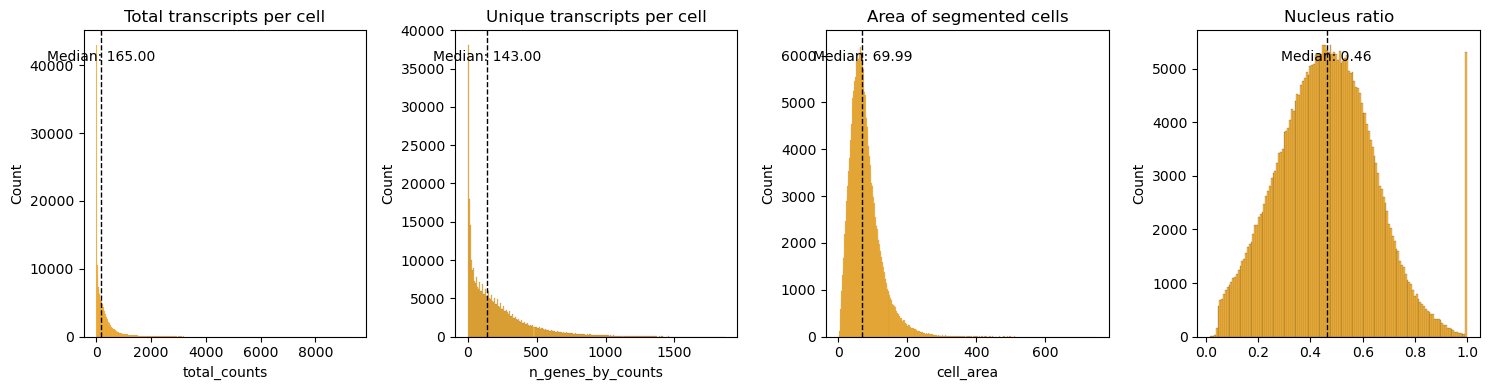

In [16]:
sc.pp.calculate_qc_metrics(adata, percent_top=(10, 20, 50, 150), inplace=True)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 4, figsize=(15, 4))

def add_median_line(ax, data, color='orange'):
    median = data.median()
    ax.axvline(median, color='k', linestyle='dashed', linewidth=1)
    ax.text(median, ax.get_ylim()[1] * 0.9, f'Median: {median:.2f}', color='k', ha='center')

# Total transcripts per cell
axs[0].set_title("Total transcripts per cell")
sns.histplot(
    adata.obs["total_counts"],
    kde=False,
    ax=axs[0],
    color='orange'
)
add_median_line(axs[0], adata.obs["total_counts"])

# Unique transcripts per cell
axs[1].set_title("Unique transcripts per cell")
sns.histplot(
    adata.obs["n_genes_by_counts"],
    kde=False,
    ax=axs[1],
    color='orange'
)
add_median_line(axs[1], adata.obs["n_genes_by_counts"])

# Area of segmented cells
axs[2].set_title("Area of segmented cells")
sns.histplot(
    adata.obs["cell_area"],
    kde=False,
    ax=axs[2],
    color='orange'
)
add_median_line(axs[2], adata.obs["cell_area"])

# Nucleus ratio
axs[3].set_title("Nucleus ratio")
sns.histplot(
    adata.obs["nucleus_area"] / adata.obs["cell_area"],
    kde=False,
    ax=axs[3],
    color='orange'
)
add_median_line(axs[3], adata.obs["nucleus_area"] / adata.obs["cell_area"])

plt.tight_layout()
plt.show()


In [17]:
cprobes = (
    adata.obs["control_probe_counts"].sum() / adata.obs["total_counts"].sum() * 100
)
cwords = (
    adata.obs["control_codeword_counts"].sum() / adata.obs["total_counts"].sum() * 100
)
print(f"Negative DNA probe count % : {cprobes}")
print(f"Negative decoding count % : {cwords}")

Negative DNA probe count % : 0.003509078206170439
Negative decoding count % : 0.0012733992591322796


In [18]:
"""
ONLY FILTERING IS IF <10 COUNTS INITIALLY
"""
sc.pp.filter_cells(adata, min_counts=10)
#sc.pp.filter_genes(adata, min_cells=2)

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [19]:
"""
make unique IDs
"""
adata.obs.index = adata.obs["cell_id"].astype(str) + "_" + adata.obs["sample_id"].astype(str) 

# Look at a sample! 

In [ ]:
adata.obs["sample_id"].value_counts()

In [ ]:
"""
PICK A SAMPLE FROM ABOVE
"""
SAMPLE_ID_TO_PLOT = ""
=
sc.pl.spatial(
        adata[adata.obs["sample_id"]==SAMPLE_ID_TO_PLOT],

        color="sample_id", # need to color the cells at some point
        spot_size=1,

        title=SAMPLE_ID_TO_PLOT + "_exciting_data",

                edgecolor="black",
        linewidth=0.01,
                legend_fontsize=12,

    )

# SAVE OUTPUT

In [20]:
adata.write(save_path_of_adata_here)

In [ ]:
"""
now you need to attach metadata + label these cellsssss

"""